# 타이타닉 사망 생존 예측하기

### 데이터 로딩


In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 구조

- PassengerId : 승객 id. 1부터 시작해서 1씩 증가되는 값
- Survived : 생존여부. 0 - 사망. 1 - 생존
- Pclass : 티켓 등급. 1 = 1등석. 2 = 2등석. 3 = 3등석
- Name : 승객이름
- Sex : 성별. male - 남자, female - 여자
- Age : 나이
- Sibsp : 동승한 형제 자매의 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 탑승한 선착장 C = Cherbourg, Q = Queenstown, S = Southampton



### 데이터 구조 확인하기


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 결측 : Age, Cabin, Embarked
- 문자열 : Name, Sex, Ticket, Cabin, Embarked


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 결측 : Age, Fare, Cabin

### 데이터 분석 및 시각화, 데이터 전처리


In [5]:
import matplotlib.pyplot as plt

In [6]:
# 생존자 수를 가져온다.
def showChart(feature) :
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', figsize=(10, 5))

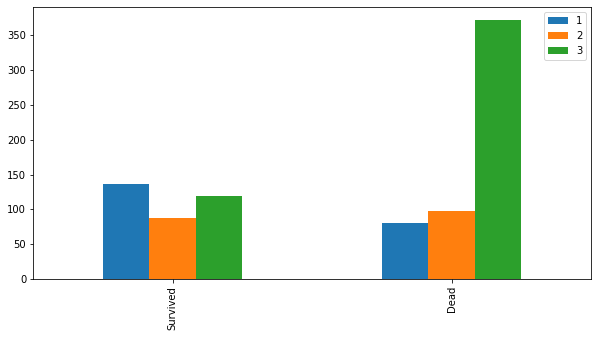

In [7]:
showChart('Pclass')

In [8]:
# 결측치, 타입 정보를 출력하는 함수
def showInfo2(feature):
    a1 = train[feature].isnull().sum()
    a2 = train[feature].isnull().sum()
    a3 = train[feature].dtype
    print(f'train 결측 : {a1}')
    print(f'test 결측 : {a2}')
    print(f'값의 타입 : {a3}')
    

### Pclass(티켓등급)

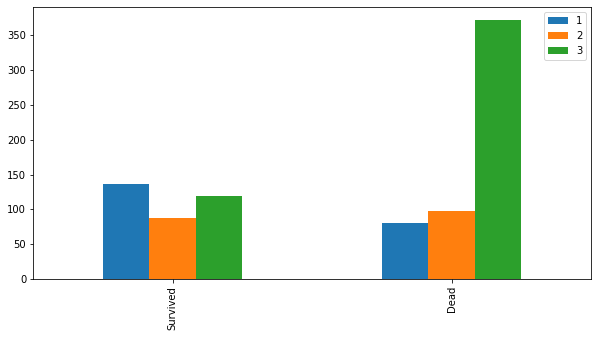

In [9]:
# 그래프 시각화
showChart('Pclass')

1등석일 수록 생존확률이 높고 3등석일 수록 사망확률이 높다.

In [10]:
# 결측치 및 타입 확인

a1 = train['Pclass'].isnull().sum()
a2 = train['Pclass'].isnull().sum()
a3 = train['Pclass'].dtype
print(a1,a2,a3)

0 0 int64


In [11]:
# 결측치 및 타입 확인
showInfo2('Pclass')

train 결측 : 0
test 결측 : 0
값의 타입 : int64


결측치가 존재하지 않고 정수타입으로 되어 있으므로 전처리X

In [12]:
# 결측치 확인
train['Pclass'].isnull().sum()

0

In [13]:
test['Pclass'].isnull().sum()

0

### Name(이름)

이름은 사망 생존과 관련이 없으므로 분석하지 않는다.

### Sex(성별)

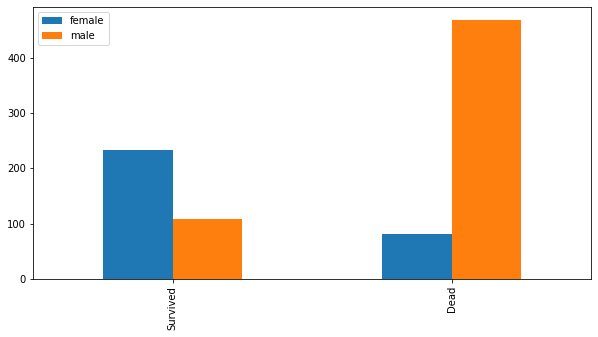

In [14]:
showChart('Sex')

남성일수록 사망할 확률이 높고 여성일수록 생존할 확률이 높다.

In [15]:
# 결측치,타입 확인
showInfo2('Sex')

train 결측 : 0
test 결측 : 0
값의 타입 : object


결측치는 없으나 값이 문자열로 되어 있기 때문에 전처리가 필요하다.

In [16]:
map1 = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(map1)
test['Sex'] = test['Sex'].map(map1)

In [17]:
showInfo2('Sex')

train 결측 : 0
test 결측 : 0
값의 타입 : int64


# Age(나이)

시각화를 하기 전에 전처리부터 먼저한다.

In [18]:
showInfo2('Age')

train 결측 : 177
test 결측 : 177
값의 타입 : float64


In [19]:
print(train['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


결측치 처리를 위해 이름의 Mr. 같은거를 토대로 해서 값을 추측한다.

In [20]:
train['Name'].str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [21]:
# title을 추출한다.
train_title = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_title = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [22]:
train_title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Mme           1
Countess      1
Lady          1
Jonkheer      1
Don           1
Capt          1
Ms            1
Name: Name, dtype: int64

In [23]:
test_title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Name, dtype: int64

In [24]:
# title을 숫자로 변경한다.
map1 = {
    'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3,
    'Dr' : 4, 'Rev' : 4, 'Major' : 4, 'Mlle' : 4,
    'Col' : 4, 'Ms' : 4, 'Don' : 4, 'Jonkheer' : 4,
    'Lady' : 4, 'Mme' : 4, 'Capt' : 4, 'Countess' : 4,
    'Sir' : 4, 'Dona' : 4
}
train['Title'] = train_title.map(map1)
test['Title'] = test_title.map(map1)

In [25]:
train_title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Mme           1
Countess      1
Lady          1
Jonkheer      1
Don           1
Capt          1
Ms            1
Name: Name, dtype: int64

In [26]:
showInfo2('Title')

train 결측 : 0
test 결측 : 0
값의 타입 : int64


In [27]:
# Title을 기준으로 그룹으로 묶고 각 그룹별 나이의 결측치를
# 중간값으로 설정한다.
# 결측치 들만 각 타이틀별 중간값으로 설정한다.
train['Age'].fillna(train.groupby('Title')['Age']
                    .transform('median'), inplace=True)

test['Age'].fillna(test.groupby('Title')['Age']
                    .transform('median'), inplace=True)


In [28]:
showInfo2('Age')

train 결측 : 0
test 결측 : 0
값의 타입 : float64


In [29]:
# 나이를 나이대로 변경한다.
# loc : 이름으로 데이터 접근이 가능한 함수
train.loc[train['Age'] <= 17, 'Age'] == 0 
train.loc[(train['Age'] > 17) & (train['Age'] <= 45), 'Age'] = 1
train.loc[(train['Age'] > 45) & (train['Age'] <= 65), 'Age'] = 2
train.loc[train['Age'] > 65, 'Age'] = 3
train['Age'].value_counts()

1.00     678
2.00     105
16.00     17
3.00      14
17.00     13
4.00      10
9.00       8
14.00      6
15.00      5
11.00      4
3.50       4
8.00       4
5.00       4
7.00       3
6.00       3
0.83       2
0.75       2
13.00      2
10.00      2
0.92       1
0.67       1
14.50      1
12.00      1
0.42       1
Name: Age, dtype: int64

In [30]:
test.loc[test['Age'] <= 17, 'Age'] == 0 
test.loc[(test['Age'] > 17) & (test['Age'] <= 45), 'Age'] = 1
test.loc[(test['Age'] > 45) & (test['Age'] <= 65), 'Age'] = 2
test.loc[test['Age'] > 65, 'Age'] = 3
test['Age'].value_counts()

1.00     324
2.00      52
17.00      7
7.00       5
13.00      3
6.00       3
3.00       3
16.00      2
14.00      2
9.00       2
10.00      2
12.00      2
8.00       2
0.92       1
15.00      1
11.50      1
0.75       1
14.50      1
5.00       1
0.33       1
0.17       1
0.83       1
Name: Age, dtype: int64

In [31]:
showInfo2('Age')

train 결측 : 0
test 결측 : 0
값의 타입 : float64


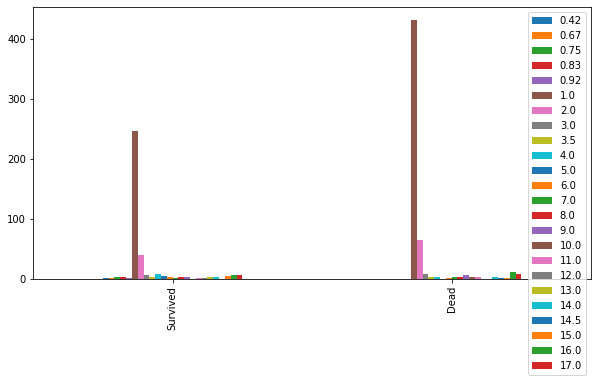

In [32]:
showChart('Age')

아이들은 생존확률이 높지만 이 후에는 사망확률이 높아진다.

### SibSp, Parch (동승한 형제자매, 부모자식의 수)

SibSp, Parch, 본인을 합산해서 가족수로 만든다.


In [33]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [34]:
showInfo2('FamilySize')

train 결측 : 0
test 결측 : 0
값의 타입 : int64


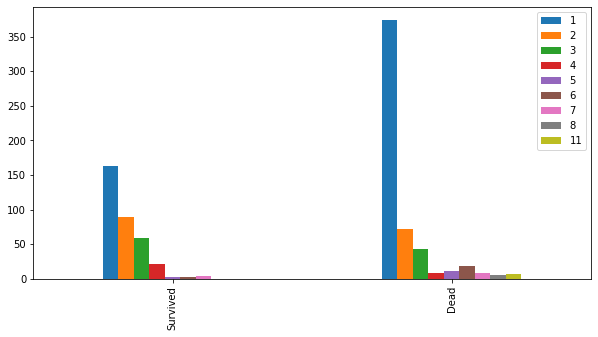

In [35]:
showChart('FamilySize')

혼자 탑승했을 경우 사망확률이 높다.

# Fare(요금)

In [36]:
showInfo2('Fare')

train 결측 : 0
test 결측 : 0
값의 타입 : float64


In [37]:
# Pclass를 기준으로 그룹으로 묶은 후 중간값을 셋팅한다.
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [38]:
train.loc[train['Fare'] <= 17, 'Fare'] == 0 
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2
train.loc[train['Fare'] > 100, 'Fare'] = 3
train['Fare'].value_counts()

2.0000     181
1.0000     161
3.0000      53
8.0500      43
13.0000     42
          ... 
12.2875      1
7.6292       1
15.0500      1
4.0125       1
12.2750      1
Name: Fare, Length: 114, dtype: int64

In [39]:
test.loc[test['Fare'] <= 17, 'Fare'] == 0 
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2
test.loc[test['Fare'] > 100, 'Fare'] = 3
test['Fare'].value_counts()

2.0000     78
1.0000     73
3.0000     31
7.7500     21
8.0500     17
           ..
7.8500      1
7.7250      1
9.3250      1
15.0333     1
15.5792     1
Name: Fare, Length: 78, dtype: int64

요금이 저렴할 수록

# 학습준비

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


In [41]:
# 학습에 불필요한 데이터를 제거한다.
drop_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 
             'Ticket', 'Cabin', 'Embarked', 'Title']
train = train.drop(drop_list, axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [42]:
# 입력데이터와 결과 데이터로 나눈다.
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

# 학습

In [43]:
from sklearn.preprocessing import StandardScaler

s1 = StandardScaler()
s1.fit(X_train)
X_train = s1.transform(X_train)

In [44]:
# k 폴드 교차 검증 : 주어진 데이터를 랜덤하게 섞어서 80% 데이터를 추출한다.
# 그 후 주어진 모델을 학습하고 성능을 평가한다.
# 이러한 행위를 k 개만큼 해서 평가된 성능을 리스트로 반환한다.

from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
# 어떤 모델을 써야 할지 모르기에 KFold를 이용.
# Fold 생성 : 데이터를 섞어서 가지고 있는 데이터 꾸러미
fold = KFold(n_splits=10, shuffle=True)

model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()

score1 = cross_val_score(model1, X_train, y_train, 
                         cv=fold, scoring='accuracy')
score2 = cross_val_score(model2, X_train, y_train, 
                         cv=fold, scoring='accuracy')
score3 = cross_val_score(model3, X_train, y_train, 
                         cv=fold, scoring='accuracy')
score4 = cross_val_score(model4, X_train, y_train, 
                         cv=fold, scoring='accuracy')

In [46]:
print(score1)
print(score2)
print(score3)
print(score4)

[0.84444444 0.74157303 0.86516854 0.83146067 0.7752809  0.82022472
 0.79775281 0.76404494 0.75280899 0.75280899]
[0.76666667 0.83146067 0.83146067 0.82022472 0.82022472 0.82022472
 0.71910112 0.83146067 0.7752809  0.7752809 ]
[0.77777778 0.74157303 0.78651685 0.80898876 0.8988764  0.78651685
 0.78651685 0.78651685 0.83146067 0.80898876]
[0.84444444 0.85393258 0.79775281 0.79775281 0.82022472 0.84269663
 0.76404494 0.78651685 0.82022472 0.75280899]


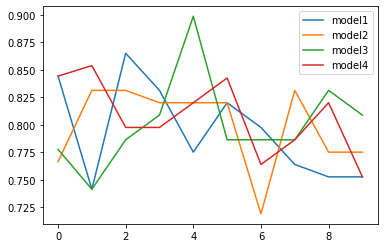

In [47]:
plt.plot(score1, label='model1')
plt.plot(score2, label='model2')
plt.plot(score3, label='model3')
plt.plot(score4, label='model4')
plt.legend()

In [48]:
# 학습한다.
model3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
# 예측 결과를 뽑는다.
PassengerId = test['PassengerId']
drop_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 
             'Ticket', 'Cabin', 'Embarked', 'Title']
test = test.drop(drop_list, axis=1)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [51]:
X_test = s1.transform(test)
X_test

array([[ 0.82737724, -0.73769513, -0.33920147,  0.40688214, -0.56097483],
       [ 0.82737724,  1.35557354, -0.04568169,  0.2237096 ,  0.05915988],
       [-0.36936484, -0.73769513, -0.04568169,  0.81738567, -0.56097483],
       ...,
       [ 0.82737724, -0.73769513, -0.33920147,  0.27893528, -0.56097483],
       [ 0.82737724, -0.73769513, -0.33920147,  0.45565746, -0.56097483],
       [ 0.82737724, -0.73769513,  1.42191719, -1.10170674,  0.67929458]])

In [52]:
y_pred = model3.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
result_df = pd.DataFrame({
    'PassengerId' : PassengerId,
    'Survived' : y_pred
})
# result_df.head()
result_df.to_csv('result.csv', index=False)

In [54]:
model3.score(X_train, y_train)

0.8888888888888888